# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv("craftcans.csv", na_values=["Does not apply"])
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [3]:
df.shape

(2416, 7)

In [4]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   object 
 6   IBUs      1405 non-null   float64
dtypes: float64(1), object(6)
memory usage: 132.3+ KB


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [6]:
#What is the top ten breweries producing different cans of beer?

In [7]:
df['Brewery'].value_counts().head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [8]:
df['ABV'].value_counts()

ABV
5.00%     215
5.50%     158
6.00%     125
6.50%     123
5.20%     107
         ... 
12.50%      1
10.40%      1
12.80%      1
12.00%      1
0.10%       1
Name: count, Length: 74, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [9]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [10]:
df.ABV.str.replace("%", "")

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

In [11]:
df.abv = df['ABV'].str.replace("%", "")
df.abv.head()

/var/folders/b8/pqq040b90d97lstdv_x2w7_r0000gn/T/ipykernel_33831/3107850151.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.abv = df['ABV'].str.replace("%", "")


0    4.50
1    4.90
2    4.80
3    6.00
4    6.00
Name: ABV, dtype: object

In [12]:
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.30%,35.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100.0
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.00%,35.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85.0


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [13]:
df['ABV'].str.replace("%", "").astype(float)

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

In [14]:
df['ABV']= df['ABV'].str.replace("%", "").astype(float)

In [15]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [16]:
df['ABV'].median()

5.6

In [17]:
df['ABV'].mean()

5.977342419080068

In [18]:
df.describe

<bound method NDFrame.describe of                           Beer              Brewery         Location  \
0                 Get Together    NorthGate Brewing  Minneapolis, MN   
1                Maggie's Leap    NorthGate Brewing  Minneapolis, MN   
2                   Wall's End    NorthGate Brewing  Minneapolis, MN   
3                      Pumpion    NorthGate Brewing  Minneapolis, MN   
4                   Stronghold    NorthGate Brewing  Minneapolis, MN   
...                        ...                  ...              ...   
2411  Mama's Little Yella Pils  Oskar Blues Brewery     Longmont, CO   
2412        GUBNA Imperial IPA  Oskar Blues Brewery     Longmont, CO   
2413                  Old Chub  Oskar Blues Brewery     Longmont, CO   
2414         Gordon Ale (2009)  Oskar Blues Brewery     Longmont, CO   
2415           Dale's Pale Ale  Oskar Blues Brewery     Longmont, CO   

                               Style    Size  ABV   IBUs  
0                       American IPA  16 o

<Axes: >

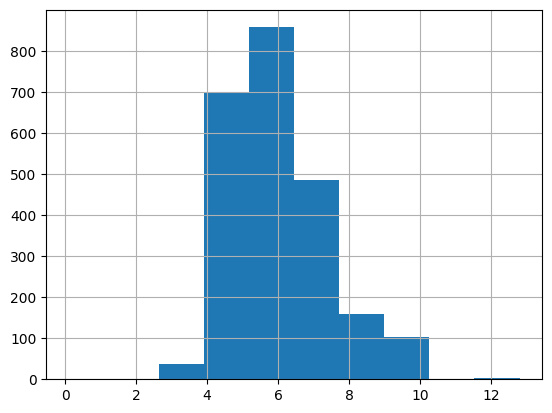

In [19]:
df['ABV'].hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [20]:
df.abv.isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   float64
 6   IBUs      1405 non-null   float64
dtypes: float64(2), object(5)
memory usage: 132.3+ KB


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [22]:
df['Location'].value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

In [23]:
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.3,35.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.0,35.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## List all of the beer from Brooklyn, NY

In [24]:
df[df.Location == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [25]:
df[df.Location == 'Brooklyn, NY'].Brewery.value_counts()

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: count, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [26]:
#Firstly, filter so we're only looking at Sixpoint Craft Ales
df[df.Brewery == 'Sixpoint Craft Ales'].Style.value_counts()


Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Rye Beer                          2
Gose                              1
Belgian Pale Ale                  1
Fruit / Vegetable Beer            1
American Pale Ale (APA)           1
American Strong Ale               1
American Brown Ale                1
American Pale Wheat Ale           1
Saison / Farmhouse Ale            1
American Stout                    1
Pumpkin Ale                       1
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [27]:
df[df.Location.str.contains(", NY", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN


### Now *count* all of the breweries in New York state

In [28]:
df[df.Location.str.contains(", NY", na=False)].Brewery.value_counts()

Brewery
Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
The Bronx Brewery                 3
KelSo Beer Company                3
Chatham Brewing                   2
Montauk Brewing Company           2
Bomb Beer Company                 2
Upstate Brewing Company           2
Newburgh Brewing Company          1
Southampton Publick House         1
The Manhattan Brewing Company     1
Dundee Brewing Company            1
Name: count, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [29]:
df[df.Style.str.contains("IPA", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [33]:
df['IBUs'].median()

35.0

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [36]:
df.IBUs.describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

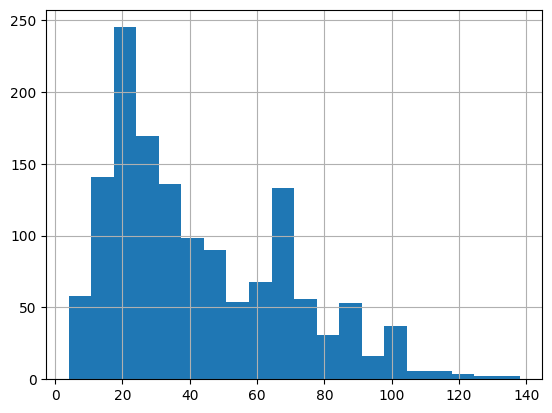

In [39]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [42]:
df.IBUs.quantile(0.75)

64.0

In [43]:
df[df.IBUs > 64]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## List all of the beers with IBUs below the 25th percentile

In [45]:
df[df.IBUs > df.IBUs.quantile(.25)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.6,47.0
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.3,35.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.0,35.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

<Axes: ylabel='Style'>

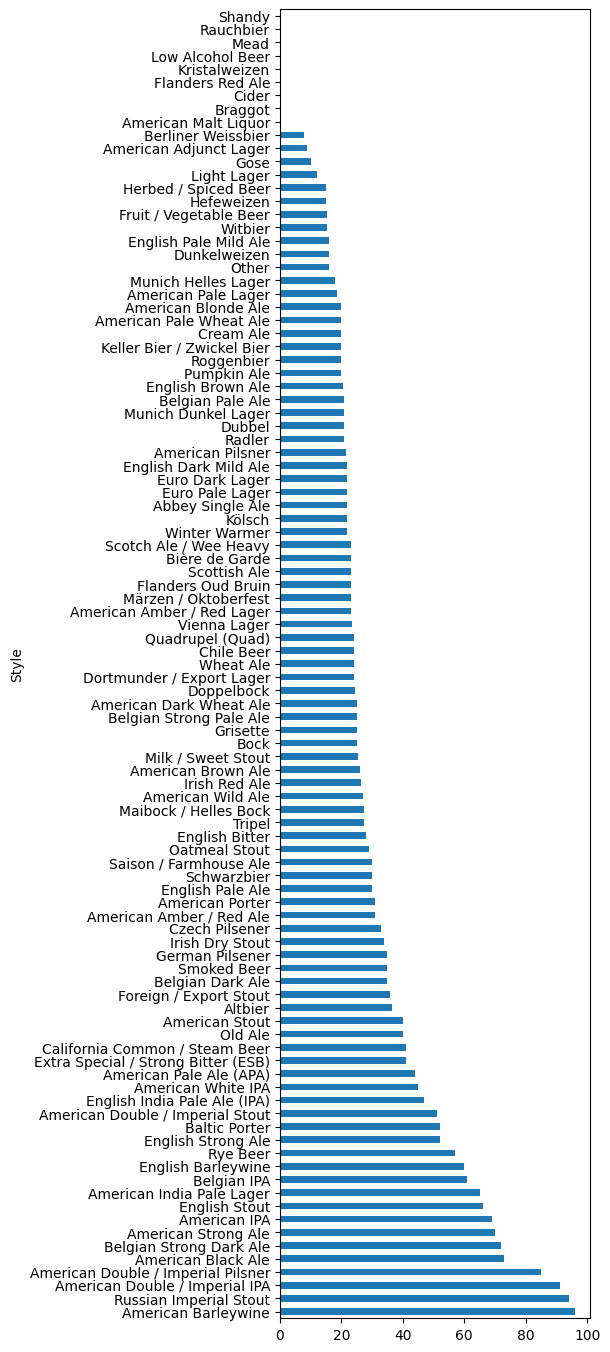

In [52]:
df.groupby("Style").IBUs.median().sort_values(ascending = False).plot(kind = 'barh', figsize = (4,17))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [57]:
df[df.IBUs < df.IBUs.quantile(.25)].Style.value_counts()

Style
American Pale Wheat Ale       43
American Blonde Ale           36
Fruit / Vegetable Beer        28
Hefeweizen                    21
Witbier                       20
American Amber / Red Ale      15
Kölsch                        11
Munich Helles Lager           11
American Adjunct Lager        11
Cream Ale                     10
American Pale Lager            9
American Brown Ale             8
Gose                           7
Saison / Farmhouse Ale         7
American Amber / Red Lager     7
Pumpkin Ale                    6
American Porter                6
American Pilsner               6
Märzen / Oktoberfest           5
English Brown Ale              5
Berliner Weissbier             5
Vienna Lager                   4
Scotch Ale / Wee Heavy         4
Oatmeal Stout                  4
German Pilsener                3
Winter Warmer                  3
Belgian Pale Ale               3
American Pale Ale (APA)        3
Herbed / Spiced Beer           3
Scottish Ale                   3
Ligh

In [58]:
df[df.IBUs > df.IBUs.quantile(.75)].Style.value_counts().head()

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [75]:
df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].IBUs.median()


18.0

## Draw a histogram of the IBUs of those beers

<Axes: >

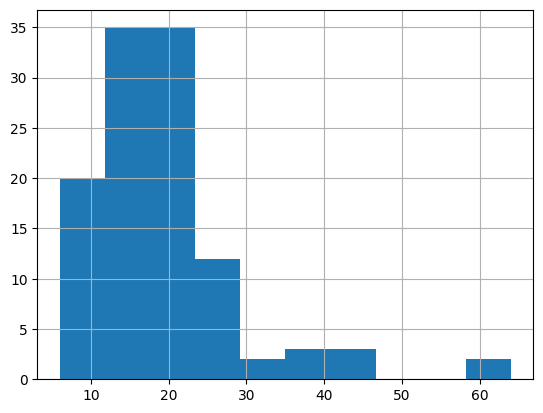

In [66]:
df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].IBUs.hist()


## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [78]:
ipa_df = df[df.Style.str.contains("IPA", na=False)]
ipa_df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0


array([[<Axes: title={'center': 'ABV'}>,
        <Axes: title={'center': 'IBUs'}>]], dtype=object)

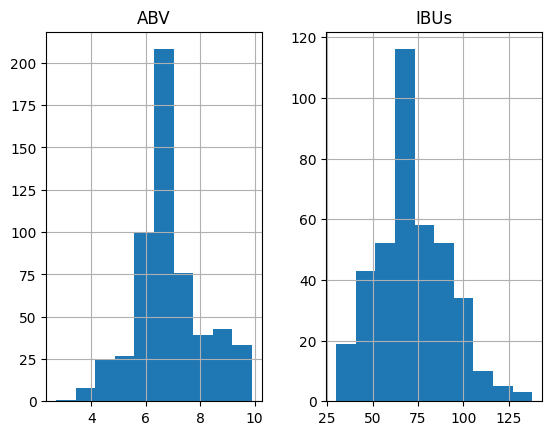

In [80]:
ipa_df.hist()

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: >

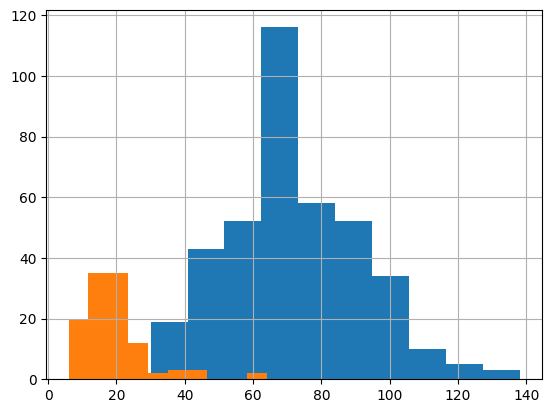

In [81]:
ax = ipa_df.IBUs.hist()
df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].IBUs.hist()

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [82]:
ipa_df.ABV.describe()

count    560.000000
mean       6.879286
std        1.240232
min        2.700000
25%        6.200000
50%        6.800000
75%        7.500000
max        9.900000
Name: ABV, dtype: float64

In [83]:
df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])].IBUs.describe()

count    112.000000
mean      18.982143
std        9.616036
min        6.000000
25%       13.750000
50%       18.000000
75%       20.250000
max       64.000000
Name: IBUs, dtype: float64

## Good work!